Tentative de stats descriptives sympa !

In [27]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Point

In [4]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

Unnamed: 0        Nom        Etat Code_Etat  id_Etat  id_county  \
964          964       Ness      Kansas        KS    27298      28302   
1598        1598  St. Louis    Missouri        MO      154      28941   
2445        2445    Bledsoe   Tennessee        TN      193      29806   
3135        3135      Lewis  Washington        WA    27331      30357   
1525        1525     DeKalb    Missouri        MO      154      28870   

           NAME                                           geometry     fips  \
964        Ness  POLYGON ((-100.247745 38.654408, -100.2472 38....  20135.0   
1598  St. Louis  POLYGON ((-90.320515 38.594152, -90.31904 38.5...  29510.0   
2445    Bledsoe  POLYGON ((-85.43618 35.542156, -85.433955 35.5...  47007.0   
3135      Lewis  POLYGON ((-123.37095 46.792128999999996, -123....  53041.0   
1525     DeKalb  POLYGON ((-94.60537699999999 40.039217, -94.58...  29063.0   

      unemp_rate_year_2013  ...  bachelors_deg_year_2018  score_legis  \
964                    2.3  ...                     18.9         0.90   
1598                   7.9  ...                     35.0         0.40   
2445                   9.3  ...                     12.9         3.35   
3135                   9.6  ...                     16.8         3.95   
1525                   5.4  ...                     15.3         0.40   

      bchecks_2013  bchecks_2014  bchecks_2015  bchecks_2016  bchecks_2017  \
964         228105        172167        185859        196548        191451   
1598        567009        517063        584875        632319        524973   
2445        600869        533394        654192        714774        767953   
3135        561122        482115        502280        713996        579678   
1525        567009        517063        584875        632319        524973   

      bchecks_2018   per_dem   per_gop  
964         172047  0.111498  0.847387  
1598        496184  0.796582  0.159188  
2445        694101  0.192688  0.778710  
3135        627301  0.289498  0.651050  
1525        496184  0.179521  0.771242  

[5 rows x 48 columns]

In [5]:
gun_violence_db = pd.read_csv('data/gun_violence_db.csv')
gun_violence_db.sample(5)

incident_id        date           state       city_or_county  \
150634       673860  2016-10-11         Florida         Jacksonville   
38800        197100  2014-09-26         Florida              Sunrise   
9807         117005  2014-03-19  North Carolina           Knightdale   
28699        174798  2014-07-28      New Jersey             Paterson   
181659       824023  2017-04-13   New Hampshire  Exeter (Kensington)   

                        address  n_killed  n_injured  \
150634          6900 Rollo Road         0          0   
38800   14501 WEST SUNRISE BLVD         0          0   
9807           Bryan Chalk Lane         0          0   
28699      101 East Main Street         0          0   
181659            Trundlebed Ln         0          0   

                                             incident_url  \
150634  http://www.gunviolencearchive.org/incident/673860   
38800   http://www.gunviolencearchive.org/incident/197100   
9807    http://www.gunviolencearchive.org/incident/117005   
28699   http://www.gunviolencearchive.org/incident/174798   
181659  http://www.gunviolencearchive.org/incident/824023   

                                               source_url  \
150634             http://callsforservice.jaxsheriff.org/   
38800   http://www.nbcmiami.com/news/local/Family-Find...   
9807    http://www.newsobserver.com/2014/03/20/3717076...   
28699   http://www.northjersey.com/news/paterson-cops-...   
181659  http://www.unionleader.com/crime/Man-accused-o...   

        incident_url_fields_missing  ...  participant_age  \
150634                        False  ...              NaN   
38800                         False  ...              NaN   
9807                          False  ...        {0: '21'}   
28699                         False  ...              NaN   
181659                        False  ...        {0: '42'}   

       participant_age_group participant_gender       participant_name  \
150634                   NaN                NaN                    NaN   
38800                    NaN                NaN                    NaN   
9807        {0: 'Adult 18+'}        {0: 'Male'}     {0: 'Keith Clark'}   
28699                    NaN                NaN   {0: 'grocery store'}   
181659      {0: 'Adult 18+'}        {0: 'Male'}  {0: 'Derron Johnson'}   

        participant_relationship         participant_status  \
150634                       NaN                        NaN   
38800                        NaN                        NaN   
9807                         NaN            {0: 'Unharmed'}   
28699                        NaN                        NaN   
181659                       NaN  {0: 'Unharmed, Arrested'}   

              participant_type  \
150634                     NaN   
38800            {0: 'Victim'}   
9807    {0: 'Subject-Suspect'}   
28699            {0: 'Victim'}   
181659  {0: 'Subject-Suspect'}   

                                                  sources  \
150634             http://callsforservice.jaxsheriff.org/   
38800   http://www.nbcmiami.com/news/local/Family-Find...   
9807    http://www.newsobserver.com/2014/03/20/3717076...   
28699   http://www.northjersey.com/news/paterson-cops-...   
181659  http://www.unionleader.com/crime/Police-Loaded...   

       state_house_district state_senate_district  
150634                 14.0                   9.0  
38800                  97.0                  29.0  
9807                   35.0                  14.0  
28699                  35.0                  35.0  
181659                716.0                  24.0  

[5 rows x 29 columns]

Première visualisation des données géographiques à notre disposition :

In [6]:
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt.loads)

Pour l'instant, on ne plot pas l'Alaska ni Hawaii :

In [7]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']


In [8]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [9]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

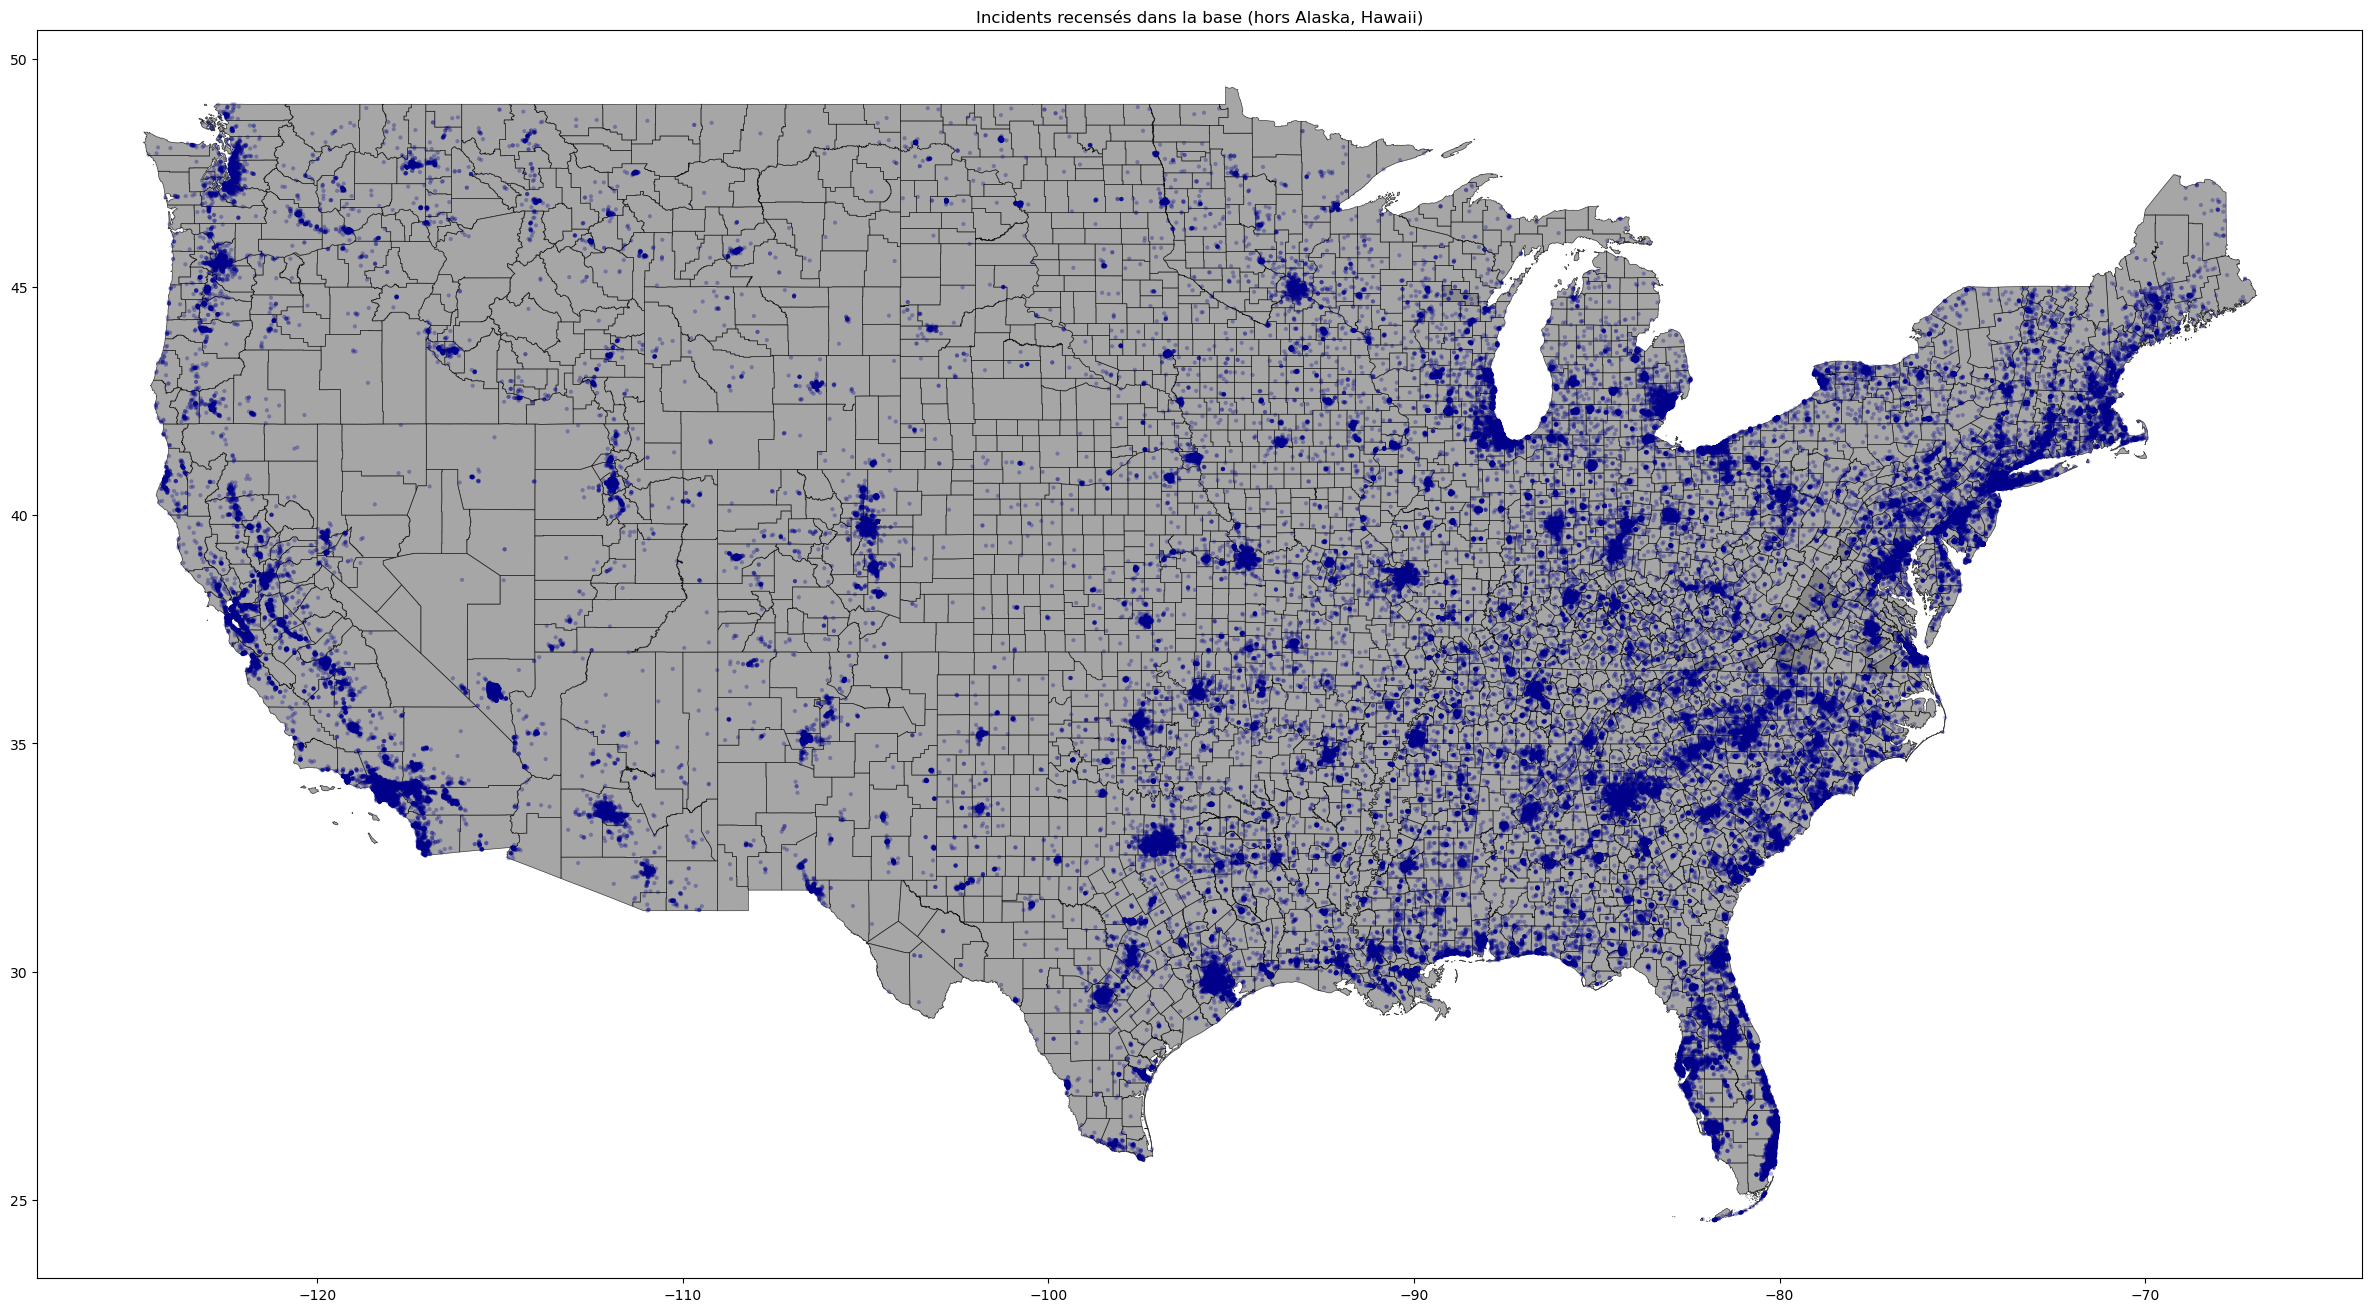

In [110]:
ax = total_db_geo.plot(color='gray', markersize=1, alpha=0.7, figsize=(30, 30), edgecolor='black', linewidth=0.5)

gun_violence_geo.plot(ax=ax, color='darkblue', alpha=0.3, marker = '.', edgecolor='none')
plt.title("Incidents recensés dans la base (hors Alaska, Hawaii)")
plt.show()

On peut également se focaliser sur une ville ou un Etat, ici New York, et visualiser la localisation exacte des incidents sur une carte interactive:

In [111]:
import folium
from folium.plugins import MarkerCluster

map_center = [40.7128, -74.0060]#Center coordinates for NYC

my_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(my_map)

for index, row in gun_violence_geo.loc[gun_violence_geo['state'] == 'New York'].iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

my_map

On peut donc comter le nombre d'incidents qui sont survenus dans chaque comté pour ensuite pondérer par la population de chaque comté.

In [37]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')
merge_geo=gpd.sjoin(gun_violence_geo, total_db_geo)

In [38]:
state_incident_counts = merge_geo.groupby('state')['n_killed'].sum().reset_index()
state_incident_counts.columns = ['state', 'sum_incident']

state_population = total_db.groupby('Etat')['resident_pop_year_2015'].sum().reset_index()
state_population.columns= ['state', 'pop']

state_incident_counts['incident_per_1K'] = state_incident_counts['sum_incident']/state_population['pop']

In [39]:
score_by_state = total_db.groupby('Etat')['score_legis'].mean().reset_index()
score_by_state.columns = ['state', 'score_legis']

In [40]:
merged_data = pd.merge(left=state_incident_counts, right = score_by_state, on='state')

In [41]:
merged_data.sort_values(by='incident_per_1K').head()

state  sum_incident  incident_per_1K  score_legis
37   Rhode Island            56         0.052986         4.35
27  New Hampshire            85         0.063552         1.55
19  Massachusetts           441         0.064877         5.10
21      Minnesota           419         0.076404         3.70
13           Iowa           250         0.080063         3.10

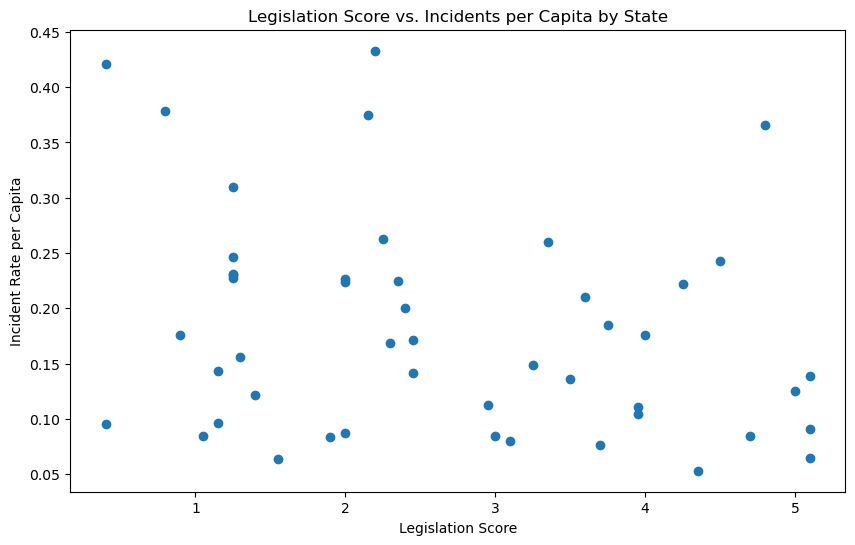

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['score_legis'], merged_data['incident_per_1K'])
plt.title('Legislation Score vs. Incidents per Capita by State')
plt.xlabel('Legislation Score')
plt.ylabel('Incident Rate per Capita')
plt.show()

In [44]:
correlation_value = merged_data['score_legis'].corr(merged_data['incident_per_1K'])

In [49]:
from scipy.stats import linregress

# Assuming df is your DataFrame and 'column1' and 'column2' are the column names
result = linregress(merged_data['incident_rate_per_1K'], merged_data['score_legis'])

# The result object contains various statistics, including the slope and intercept
slope = result.slope
intercept = result.intercept
correlation_coefficient = result.rvalue
p_value = result.pvalue
standard_error = result.stderr

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
print(f"Standard Error: {standard_error}")

KeyError: 'incident_rate_per_1K'